In [2]:
# Importing neccesary modules

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# importing the data for analysis

df = pd.read_csv('marketing_AB.csv')

df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [4]:
# Checking the neccesary information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
# Checking if the data contain null values in any of the columns

df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [6]:
# Renaming the columns by replacing the whitespace with "_"

df.columns = df.columns.str.strip().str.replace(' ', '_')

df.head()

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
# Seperating discrete data from numerical data

discrete_df = df.select_dtypes(include= ['object'])

numerical_df = df.select_dtypes(include=['int64'])



In [8]:
# creating a function for analyzing discrete data 

def discrete_analysis(discrete_data):
    for col_names in discrete_data:
        print("*" * 10, col_names , "*" * 10)
        print(discrete_data[col_names].agg(['count', 'nunique', 'unique']))
        print("Value Counts \n", discrete_data[col_names].value_counts())
        print()


In [9]:
# calling the function with discrete data 

discrete_analysis(discrete_df)

********** test_group **********
count         588101
nunique            2
unique     [ad, psa]
Name: test_group, dtype: object
Value Counts 
 test_group
ad     564577
psa     23524
Name: count, dtype: int64

********** most_ads_day **********
count                                                 588101
nunique                                                    7
unique     [Monday, Tuesday, Friday, Saturday, Wednesday,...
Name: most_ads_day, dtype: object
Value Counts 
 most_ads_day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64



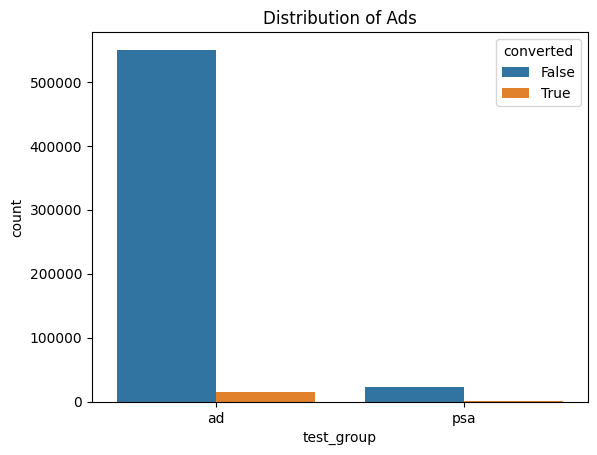

In [ ]:
# Visualizing the distribution of ads

sns.countplot(data= df, x= 'test_group', hue='converted')
plt.title("Distribution of Ads")

plt.show()

From the chart above, it shows that the ads was not succesful as the bar of the 'false' ads is higher than the 'true' bar

In [ ]:
# Statistics of converted test_group 

df_ads_statistics = df.groupby('test_group')['converted'].value_counts()

print(df_ads_statistics)

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64


From the statistics above it shows that the number of unsuccesful ads(False) is higher than the total number of succesful ads(True)

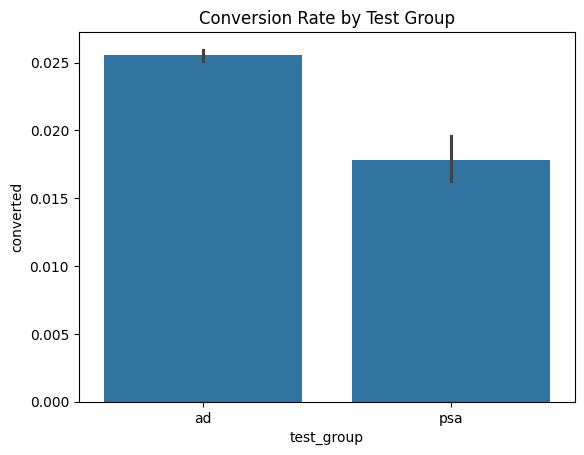

In [ ]:
# Ratio of ad to psa advertisement

sns.barplot(data=df, x = 'test_group', y='converted')
plt.title('Conversion Rate by Test Group')
plt.show()

from the chart above it shows that the ad test_group is higher than psa test_group

In [ ]:
# calculating potential revenue generated from the ads
# Assume $10 for each converted succesful test_group

potential_revenue = df['converted'].sum() * 10

print(f"The potential revenue generated from the ads is ${potential_revenue}")

The potential revenue generated from the ads is $148430
